# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
salarydata_train = pd.read_csv('/content/SalaryData_Train.csv.crdownload')
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salarydata_test = pd.read_csv('/content/SalaryData_Train.csv.crdownload')
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory data analysis

In [4]:

salarydata_train.shape

(12224, 14)

In [5]:

salarydata_test.shape

(12224, 14)

In [6]:
# preview the Training dataset

salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# preview the Test dataset

salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12224 entries, 0 to 12223
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            12224 non-null  int64 
 1   workclass      12224 non-null  object
 2   education      12224 non-null  object
 3   educationno    12224 non-null  int64 
 4   maritalstatus  12224 non-null  object
 5   occupation     12224 non-null  object
 6   relationship   12224 non-null  object
 7   race           12224 non-null  object
 8   sex            12224 non-null  object
 9   capitalgain    12224 non-null  int64 
 10  capitalloss    12224 non-null  int64 
 11  hoursperweek   12224 non-null  int64 
 12  native         12224 non-null  object
 13  Salary         12224 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [9]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000
mean,38.368210,10.122546,1080.759244,89.367147,41.012516
std,13.093149,2.531232,7393.239751,403.930170,11.838233
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:

salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12224 entries, 0 to 12223
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            12224 non-null  int64 
 1   workclass      12224 non-null  object
 2   education      12224 non-null  object
 3   educationno    12224 non-null  int64 
 4   maritalstatus  12224 non-null  object
 5   occupation     12224 non-null  object
 6   relationship   12224 non-null  object
 7   race           12224 non-null  object
 8   sex            12224 non-null  object
 9   capitalgain    12224 non-null  int64 
 10  capitalloss    12224 non-null  int64 
 11  hoursperweek   12224 non-null  int64 
 12  native         12224 non-null  object
 13  Salary         12224 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [11]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000
mean,38.368210,10.122546,1080.759244,89.367147,41.012516
std,13.093149,2.531232,7393.239751,403.930170,11.838233
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
#Finding the special characters in the data frame 
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:

#Finding the special characters in the data frame 
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:

print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

## Explore categorical variables

In [15]:
# find categorical variables

categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [16]:
# view the categorical variables

salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## EXplore  Problem with in categorical variables

In [17]:
# check missing values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [18]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts())


 Private             9021
 Self-emp-not-inc    1015
 Local-gov            828
 State-gov            548
 Self-emp-inc         440
 Federal-gov          370
 Without-pay            2
Name: workclass, dtype: int64
 HS-grad         4025
 Some-college    2751
 Bachelors       2037
 Masters          676
 Assoc-voc        505
 11th             421
 Assoc-acdm       390
 10th             339
 7th-8th          231
 Prof-school      213
 9th              176
 Doctorate        145
 12th             133
 5th-6th          110
 1st-4th           57
 Preschool         15
Name: education, dtype: int64
 Married-civ-spouse       5701
 Never-married            3921
 Divorced                 1728
 Separated                 393
 Widowed                   317
 Married-spouse-absent     155
 Married-AF-spouse           9
Name: maritalstatus, dtype: int64
 Prof-specialty       1622
 Craft-repair         1609
 Exec-managerial      1584
 Adm-clerical         1568
 Sales                1485
 Other-service      

In [19]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.737974
 Self-emp-not-inc    0.083033
 Local-gov           0.067736
 State-gov           0.044830
 Self-emp-inc        0.035995
 Federal-gov         0.030268
 Without-pay         0.000164
Name: workclass, dtype: float64
 HS-grad         0.329270
 Some-college    0.225049
 Bachelors       0.166639
 Masters         0.055301
 Assoc-voc       0.041312
 11th            0.034440
 Assoc-acdm      0.031904
 10th            0.027732
 7th-8th         0.018897
 Prof-school     0.017425
 9th             0.014398
 Doctorate       0.011862
 12th            0.010880
 5th-6th         0.008999
 1st-4th         0.004663
 Preschool       0.001227
Name: education, dtype: float64
 Married-civ-spouse       0.466378
 Never-married            0.320762
 Divorced                 0.141361
 Separated                0.032150
 Widowed                  0.025933
 Married-spouse-absent    0.012680
 Married-AF-spouse        0.000736
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13269

In [20]:
# check labels in workclass variable

salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [21]:
# check frequency distribution of values in workclass variable

salarydata_train.workclass.value_counts()

 Private             9021
 Self-emp-not-inc    1015
 Local-gov            828
 State-gov            548
 Self-emp-inc         440
 Federal-gov          370
 Without-pay            2
Name: workclass, dtype: int64

## Explore occupation variable

In [22]:
# check labels in occupation variable

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
# check frequency distribution of values in occupation variable

salarydata_train.occupation.value_counts()

 Prof-specialty       1622
 Craft-repair         1609
 Exec-managerial      1584
 Adm-clerical         1568
 Sales                1485
 Other-service        1328
 Machine-op-inspct     800
 Transport-moving      637
 Handlers-cleaners     522
 Farming-fishing       386
 Tech-support          356
 Protective-serv       264
 Priv-house-serv        61
 Armed-Forces            2
Name: occupation, dtype: int64

## Explore native country variable

In [24]:
# check labels in native_country variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [25]:
# check frequency distribution of values in native_country variable

salarydata_train.native.value_counts()

 United-States                 11133
 Mexico                          239
 Philippines                      74
 Germany                          57
 Puerto-Rico                      54
 Canada                           48
 El-Salvador                      39
 India                            37
 Jamaica                          36
 England                          36
 Cuba                             36
 South                            33
 China                            31
 Guatemala                        29
 Poland                           27
 Vietnam                          27
 Dominican-Republic               26
 Italy                            26
 Japan                            22
 Iran                             22
 Taiwan                           19
 Haiti                            19
 Greece                           18
 Columbia                         16
 Portugal                         13
 Ecuador                          12
 Peru                             12
 

## Number of labels: cardinality

In [26]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


## Explore Numerical variable

In [27]:
# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [28]:
# view the numerical variables

salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


## Explore problems within numerical variable

In [29]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

## Declare feature vector and target variable

In [30]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

## Split data into separate training and test set

In [32]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0) 

In [33]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8556, 13), (3668, 13))

## Feature Engineering

In [34]:

X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [35]:

X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [36]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [37]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [38]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [39]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [40]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True) 

In [41]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [42]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [43]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [44]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

## Encode categorical variables

In [45]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [46]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
5189,Private,Assoc-acdm,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
8848,Private,Masters,Divorced,Other-service,Unmarried,White,Female,United-States
4208,Private,11th,Separated,Craft-repair,Own-child,White,Male,United-States
6711,Private,HS-grad,Married-spouse-absent,Sales,Not-in-family,Black,Female,United-States
6161,Private,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,United-States


In [47]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 702 kB/s 


In [48]:
# import category encoders

import category_encoders as ce

In [49]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [50]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_1,education_2,education_3,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
5189,38,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8848,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4208,25,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6711,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6161,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train.shape

(8556, 101)

In [52]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_1,education_2,education_3,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
9334,27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8380,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10185,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6682,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,46,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_test.shape

(3668, 101)

## Feature Scaling

In [54]:
cols = X_train.columns

In [55]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [56]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [57]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [58]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_1,education_2,education_3,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model training

In [59]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Predict the results

In [60]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype='<U6')

### Check accuracy score

In [61]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7972


## Compare the train-set and test-set accuracy

In [62]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [63]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7918


## Check for overfitting and underfitting

In [64]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7918
Test set score: 0.7972


## Compare model accuracy with null accuracy

In [65]:
# check class distribution in test set

y_test.value_counts()

 <=50K    2760
 >50K      908
Name: Salary, dtype: int64

In [66]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


## Confusion matrix

In [67]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2158  602]
 [ 142  766]]

True Positives(TP) =  2158

True Negatives(TN) =  766

False Positives(FP) =  602

False Negatives(FN) =  142


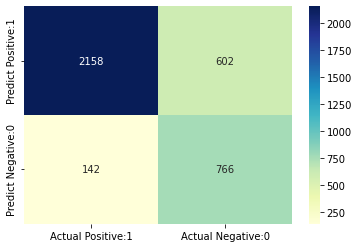

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.78      0.85      2760
        >50K       0.56      0.84      0.67       908

    accuracy                           0.80      3668
   macro avg       0.75      0.81      0.76      3668
weighted avg       0.84      0.80      0.81      3668



## Classification accuracy

In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [71]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7972


## Classification error

In [72]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2028


## Precision

In [73]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7819


## Recall

In [74]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9383


In [75]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9383


## False Positive Rate

In [76]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4401


## Specificity

In [77]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5599


## Calculate class probabilities

In [78]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999122e-01, 8.78388322e-07],
       [9.99996353e-01, 3.64672040e-06],
       [7.14589712e-03, 9.92854103e-01],
       [7.65479667e-01, 2.34520333e-01],
       [1.64436059e-07, 9.99999836e-01],
       [9.99999940e-01, 6.03145097e-08],
       [9.98165339e-01, 1.83466075e-03],
       [9.99999859e-01, 1.40606497e-07],
       [9.99857870e-01, 1.42129619e-04],
       [9.41204922e-02, 9.05879508e-01]])

In [79]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999991e-01,8.783883e-07
1,9.999964e-01,3.646720e-06
2,7.145897e-03,9.928541e-01
3,7.654797e-01,2.345203e-01
4,1.644361e-07,9.999998e-01
5,9.999999e-01,6.031451e-08
6,9.981653e-01,1.834661e-03
7,9.999999e-01,1.406065e-07
8,9.998579e-01,1.421296e-04
9,9.412049e-02,9.058795e-01


In [80]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([8.78388322e-07, 3.64672040e-06, 9.92854103e-01, 2.34520333e-01,
       9.99999836e-01, 6.03145097e-08, 1.83466075e-03, 1.40606497e-07,
       1.42129619e-04, 9.05879508e-01])

In [81]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

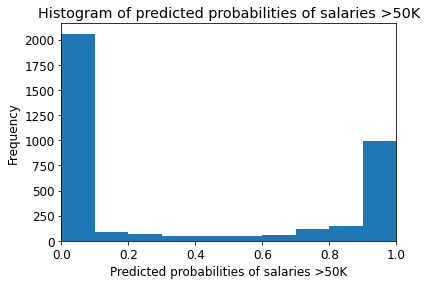

In [82]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

## ROC - AUC

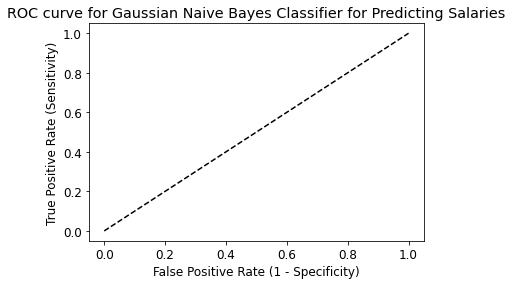

In [83]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [84]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8978


## Interpretation

In [85]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8862


## K - Fold Cross validation

In [86]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7932243  0.81542056 0.80841121 0.7838785  0.77453271 0.76285047
 0.79532164 0.78596491 0.78830409 0.79649123]


In [87]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7904
